In [21]:
# Import all the necessary libraries.
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import random

%matplotlib inline

In [22]:
# Reset the pseudo random number generator to the same value.
np.random.seed(1234)

In [23]:
def learning_schedule(eta_int, epoch):
    return eta_int*np.exp(-epoch)

# learning schedule hyperparameters
def learning_schedule(t, t0=2, t1=25):
    return t0 / (t + t1)

# learning schedule hyperparameters
def learning_schedule(ls_type, alpha_int, t, k=0.01):
    if ls_type == 'exp':
        alpha = alpha_int * np.exp(-k*t)
    else:
        alpha = alpha_int
    return alpha

In [24]:
# Define the number of examples.
M = 1000

# Attributes. 
x1 = np.random.randn(M, 1)
x2 = np.random.randn(M, 1)

# Target/true function.
y = x1 + x2

# Observable function (noisy).
y_noisy = y + np.random.randn(M, 1)

In [25]:
# Generate values for parameters.
N = 200
a1 = np.linspace(-12.0, 14.0, N)
a2 = np.linspace(-12.0, 14.0, N)

A1, A2 = np.meshgrid(a1, a2)

# Generate points for plotting the cost-function surface.
J = np.zeros((N,N))
for iter1 in range(0, N):
    for iter2 in range(0, N):
        yhat = A1[iter1][iter2]*x1 + A2[iter1][iter2]*x2
        J[iter1][iter2] = (1.0/M)*np.sum(np.square(y_noisy - yhat))

In [26]:
# Concatenate both column vectors, x1 and x2.
X = np.c_[x1, x2]

# Closed-form solution.
a_opt = np.linalg.pinv(np.transpose(X).dot(X)).dot(np.transpose(X).dot(y_noisy))
yhat = X.dot(a_opt)
Joptimum = (1/M)*np.sum(np.power((y_noisy - yhat), 2))

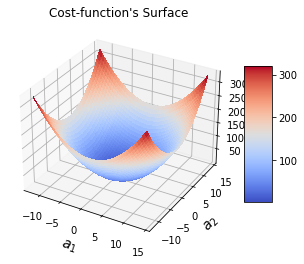

In [27]:
# Plot cost-function surface.
fig = plt.figure(figsize=(5,5))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(A1, A2, J, cmap=cm.coolwarm, linewidth=0, antialiased=False)
# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_xlabel('$a_1$', fontsize=14)
ax.set_ylabel('$a_2$', fontsize=14)
ax.set_zlabel('$J_e$', fontsize=14)
plt.title('Cost-function\'s Surface')
#plt.savefig("error_surface_mb_gd.png", dpi=600)
#Show the plot.
plt.show()

In [28]:
# Number of epochs.
n_epochs = 1
# Constant learning rate.
alpha_int = 0.3

# Random initialization of parameters.
a = np.array([-10.0, -10.0]).reshape(2, 1)

# Create vector for parameter history.
a_hist = np.zeros((2, n_epochs*M+1))
# Initialize history vector.
a_hist[:, 0] = a.reshape(2,)

# Create vector to store eta history.
alpha_hist = np.zeros((n_epochs*M))

# Create array for storing error values.
Jgd = np.zeros(n_epochs*M+1)

Jgd[0] = (1.0/M)*sum(np.power(y_noisy - X.dot(a), 2))

# Mini-batch size.
mb_size = 10

inc = 0
# Stocastic gradient-descent loop.
grad_hist = np.zeros((2, n_epochs*M))
for epoch in range(n_epochs):
    for i in range(0, M, mb_size):
        random_indexes = random.sample(range(0, M), mb_size)
        xi = X[random_indexes]
        yi = y_noisy[random_indexes]
        gradients = -(2.0/mb_size)*xi.T.dot(yi - xi.dot(a))
        grad_hist[:, epoch*M+inc] = gradients.reshape(2,)       
        alpha = learning_schedule('none', alpha_int, epoch*M + inc)
        alpha_hist[epoch*M+inc] = alpha
        a = a - alpha*gradients
        a_hist[:, epoch*M+inc+1] = a.reshape(2,)
        Jgd[epoch*M+inc+1] = (1.0/M)*sum(np.power((y_noisy - X.dot(a)), 2))
        inc = inc + 1

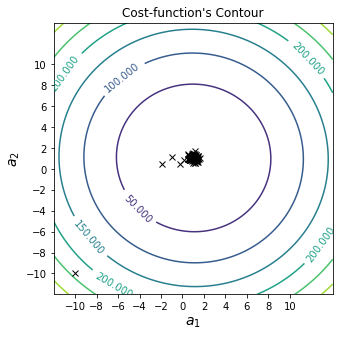

In [29]:
# Plot contour figure.        
fig = plt.figure(figsize=(5,5))
cp = plt.contour(A1, A2, J)
plt.clabel(cp, inline=1, fontsize=10)
plt.xlabel('$a_1$', fontsize=14)
plt.ylabel('$a_2$', fontsize=14)
plt.title('Cost-function\'s Contour')
plt.plot(a_opt[0], a_opt[1], c='r', marker='*')
plt.plot(a_hist[0, 0:inc+1], a_hist[1, 0:inc+1], 'kx')
plt.xticks(np.arange(-10, 12, step=2.0))
plt.yticks(np.arange(-10, 12, step=2.0))
#plt.savefig("error_contour_mb_gd.png", dpi=600)
plt.show()

In [30]:
# Print found values.
print('a0_opt: ' + str(a_opt[0, 0]))
print('a1_opt: ' + str(a_opt[1, 0]))

print('a0_sgd: ' + str(a[0, 0]))
print('a1_sgd: ' + str(a[1, 0]))

a0_opt: 1.0373518580863201
a1_opt: 1.054902171742376
a0_sgd: 1.1047473399083862
a1_sgd: 0.714794300091591


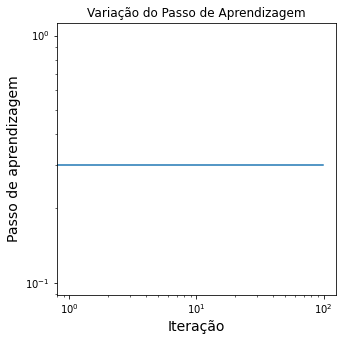

In [31]:
# Plot eta history     
fig = plt.figure(figsize=(5,5))
plt.plot(range(0,inc), alpha_hist[0:inc])
plt.yscale("log")
plt.xscale("log")
plt.xlabel('Iteração', fontsize=14)
plt.ylabel('Passo de aprendizagem', fontsize=14)
plt.title('Variação do Passo de Aprendizagem')
#plt.savefig("passo_de_aprendizagem_mb_gd.png", dpi=600)
plt.show()

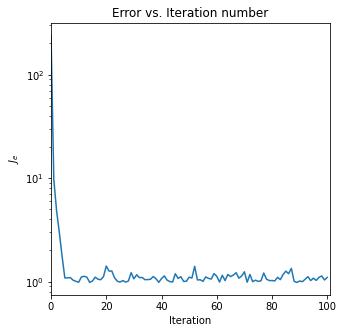

In [34]:
fig = plt.figure(figsize=(5,5))

plt.plot(np.arange(0, inc+1), Jgd[0:inc+1])
plt.xlim((0, inc+1))
plt.yscale('log')
plt.xlabel('Iteration')
plt.ylabel('$J_e$')
plt.title('Error vs. Iteration number')
#plt.savefig("error_vs_iteration_bgd.png", dpi=600)
plt.show()

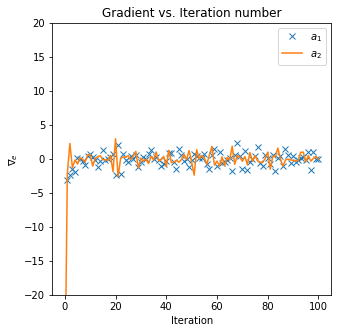

In [33]:
fig = plt.figure(figsize=(5,5))

plt.plot(np.arange(0, inc+1), grad_hist[0,0:inc+1], 'x', label='$a_1$')
plt.plot(np.arange(0, inc+1), grad_hist[1,0:inc+1], label='$a_2$')
plt.ylim([-20, 20])
plt.xlabel('Iteration')
plt.ylabel('$\\nabla_e$')
plt.title('Gradient vs. Iteration number')
plt.legend()
plt.show()